<h1 align="center">Images</h1>

<table width="100%">
<tr style="background-color: red;"><td><font color="white">SimpleITK conventions:</font></td></tr>
<tr><td>
<ul>
<li>Image access is in x,y,z order, image.GetPixel(x,y,z) or image[x,y,z], with zero based indexing.</li>
<li>If the output of an ITK filter has non-zero starting index, then the index will be set to 0, and the origin adjusted accordingly.</li>
</ul>
</td></tr>
</table>

The unique feature of SimpleITK (derived from ITK) as a toolkit for image manipulation and analysis is that it views <b>images as physical objects occupying a bounded region in physical space</b>. In addition images can have different spacing between pixels along each axis, and the axes are not necessarily orthogonal. The following figure illustrates these concepts. 

<img src="ImageOriginAndSpacing.png" style="width:700px"/><br><br>


### Pixel Types

The pixel type is represented as an enumerated type. The following is a table of the enumerated list.

<table>
  <tr><td>sitkUInt8</td><td>Unsigned 8 bit integer</td></tr>
  <tr><td>sitkInt8</td><td>Signed 8 bit integer</td></tr>
  <tr><td>sitkUInt16</td><td>Unsigned 16 bit integer</td></tr>
  <tr><td>sitkInt16</td><td>Signed 16 bit integer</td></tr>
  <tr><td>sitkUInt32</td><td>Unsigned 32 bit integer</td></tr>
  <tr><td>sitkInt32</td><td>Signed 32 bit integer</td></tr>
  <tr><td>sitkUInt64</td><td>Unsigned 64 bit integer</td></tr>
  <tr><td>sitkInt64</td><td>Signed 64 bit integer</td></tr>
  <tr><td>sitkFloat32</td><td>32 bit float</td></tr>
  <tr><td>sitkFloat64</td><td>64 bit float</td></tr>
  <tr><td>sitkComplexFloat32</td><td>complex number of 32 bit float</td></tr>
  <tr><td>sitkComplexFloat64</td><td>complex number of 64 bit float</td></tr>
  <tr><td>sitkVectorUInt8</td><td>Multi-component of unsigned 8 bit integer</td></tr>
  <tr><td>sitkVectorInt8</td><td>Multi-component of signed 8 bit integer</td></tr>
  <tr><td>sitkVectorUInt16</td><td>Multi-component of unsigned 16 bit integer</td></tr>
  <tr><td>sitkVectorInt16</td><td>Multi-component of signed 16 bit integer</td></tr>
  <tr><td>sitkVectorUInt32</td><td>Multi-component of unsigned 32 bit integer</td></tr>
  <tr><td>sitkVectorInt32</td><td>Multi-component of signed 32 bit integer</td></tr>
  <tr><td>sitkVectorUInt64</td><td>Multi-component of unsigned 64 bit integer</td></tr>
  <tr><td>sitkVectorInt64</td><td>Multi-component of signed 64 bit integer</td></tr>
  <tr><td>sitkVectorFloat32</td><td>Multi-component of 32 bit float</td></tr>
  <tr><td>sitkVectorFloat64</td><td>Multi-component of 64 bit float</td></tr>
  <tr><td>sitkLabelUInt8</td><td>RLE label of unsigned 8 bit integers</td></tr>
  <tr><td>sitkLabelUInt16</td><td>RLE label of unsigned 16 bit integers</td></tr>
  <tr><td>sitkLabelUInt32</td><td>RLE label of unsigned 32 bit integers</td></tr>
  <tr><td>sitkLabelUInt64</td><td>RLE label of unsigned 64 bit integers</td></tr>
</table>

There is also `sitkUnknown`, which is used for undefined or erroneous pixel ID's. It has a value of -1.

The 64-bit integer types are not available on all distributions. When not available the value is `sitkUnknown`.

In [1]:
import SimpleITK as sitk

from __future__ import print_function

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from ipywidgets import interact, fixed
import os

OUTPUT_DIR = 'Output'

# Utility method that either downloads data from the MIDAS repository or
# if already downloaded returns the file name for reading from disk (cached data).
%run update_path_to_download_script
from downloaddata import fetch_data as fdata

## Load your first image and display it

TypeError: Invalid dimensions for image data

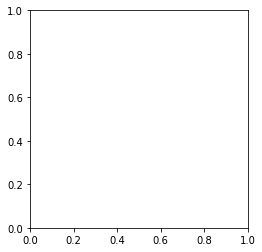

In [4]:
logo = sitk.ReadImage("Patient_1/1.3.12.2.1107.5.99.2.1013.30000008030612131778100062805.dcm")

plt.imshow(sitk.GetArrayViewFromImage(logo))
plt.axis('off');

## Image Construction

There are a variety of ways to create an image. 

The following components are required for a complete definition of an image:
<ol>
<li>Pixel type [fixed on creation, no default]: unsigned 32 bit integer, sitkVectorUInt8, etc., see list above.</li>
<li> Sizes [fixed on creation, no default]: number of pixels/voxels in each dimension. This quantity implicitly defines the image dimension.</li>
<li> Origin [default is zero]: coordinates of the pixel/voxel with index (0,0,0) in physical units (i.e. mm).</li>
<li> Spacing [default is one]: Distance between adjacent pixels/voxels in each dimension given in physical units.</li>
<li> Direction matrix [default is identity]: mapping, rotation, between direction of the pixel/voxel axes and physical directions.</li>
</ol>

Initial pixel/voxel values are set to zero.

In [6]:
image_3D = sitk.Image(256, 128, 64, sitk.sitkInt16)
image_2D = sitk.Image(64, 64, sitk.sitkFloat32)
image_2D = sitk.Image([32,32], sitk.sitkUInt32)
image_RGB = sitk.Image([128,64], sitk.sitkVectorUInt8, 3)

## Basic Image Attributes

You can change the image origin, spacing and direction. Making such changes to an image already containing data should be done cautiously. 

In [7]:
image_3D.SetOrigin((78.0, 76.0, 77.0))
image_3D.SetSpacing([0.5,0.5,3.0])

print(image_3D.GetOrigin())
print(image_3D.GetSize())
print(image_3D.GetSpacing())
print(image_3D.GetDirection())

(78.0, 76.0, 77.0)
(256, 128, 64)
(0.5, 0.5, 3.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)


Image dimension queries:

In [8]:
print(image_3D.GetDimension())
print(image_3D.GetWidth())
print(image_3D.GetHeight())
print(image_3D.GetDepth())

3
256
128
64


What is the depth of a 2D image?

In [ ]:
print(image_2D.GetSize())
print(image_2D.GetDepth())

Pixel/voxel type queries: 

In [ ]:
print(image_3D.GetPixelIDValue())
print(image_3D.GetPixelIDTypeAsString())
print(image_3D.GetNumberOfComponentsPerPixel())

What is the dimension and size of a Vector image and its data?

In [ ]:
print(image_RGB.GetDimension())
print(image_RGB.GetSize())
print(image_RGB.GetNumberOfComponentsPerPixel())

## Accessing Pixels and Slicing

The Image class's member functions ``GetPixel`` and ``SetPixel`` provide an ITK-like interface for pixel access.

In [ ]:
help(image_3D.GetPixel)

In [9]:
print(image_3D.GetPixel(0, 0, 0))
image_3D.SetPixel(0, 0, 0, 1)
print(image_3D.GetPixel(0, 0, 0))

# This can also be done using Pythonic notation.
print(image_3D[0,0,1])
image_3D[0,0,1] = 2
print(image_3D[0,0,1])

0
1
0
2


Slicing of SimpleITK images returns a copy of the image data. 

This is similar to slicing Python lists and differs from the "view" returned by slicing numpy arrays. 

TypeError: Invalid dimensions for image data

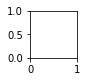

In [10]:
# Brute force sub-sampling 
logo_subsampled = logo[::2,::2]

# Get the sub-image containing the word Simple
simple = logo[0:115,:]

# Get the sub-image containing the word Simple and flip it
simple_flipped = logo[115:0:-1,:]

n = 4

plt.subplot(n,1,1)
plt.imshow(sitk.GetArrayViewFromImage(logo))
plt.axis('off');

plt.subplot(n,1,2)
plt.imshow(sitk.GetArrayViewFromImage(logo_subsampled))
plt.axis('off');

plt.subplot(n,1,3)
plt.imshow(sitk.GetArrayViewFromImage(simple))
plt.axis('off')

plt.subplot(n,1,4)
plt.imshow(sitk.GetArrayViewFromImage(simple_flipped))
plt.axis('off');

Draw a square on top of the logo image:
After running this cell, uncomment "Version 3" and see its effect.

In [ ]:
# Version 0: get the numpy array and assign the value via broadcast - later on you will need to construct 
# a new image from the array 
logo_pixels = sitk.GetArrayFromImage(logo)
logo_pixels[0:10,0:10] = [0,255,0]

# Version 1: generates an error, the image slicing returns a new image and you cannot assign a value to an image 
#logo[0:10,0:10] = [255,0,0]

# Version 2: image slicing returns a new image, so all assignments here will not have any effect on the original
# 'logo' image
logo_subimage = logo[0:10, 0:10]
for x in range(0,10):
    for y in range(0,10):
        logo_subimage[x,y] = [255,0,0]

# Version 3: modify the original image, iterate and assign a value to each pixel
#for x in range(0,10):
#    for y in range(0,10):
#        logo[x,y] = [255,0,0]

        
plt.subplot(2,1,1)
plt.imshow(sitk.GetArrayViewFromImage(logo))
plt.axis('off')

plt.subplot(2,1,2)
plt.imshow(logo_pixels)
plt.axis('off');

## Conversion between numpy and SimpleITK

SimpleITK and numpy indexing access is in opposite order! 

SimpleITK: image[x,y,z]<br>
numpy: image_numpy_array[z,y,x]

### From SimpleITK to numpy

We have two options for converting from SimpleITK to numpy:
* GetArrayFromImage(): returns a copy of the image data. You can then freely modify the data as it has no effect on the original SimpleITK image.
* GetArrayViewFromImage(): returns a view on the image data which is useful for display in a memory efficient manner. You cannot modify the data and __the view will be invalid if the original SimpleITK image is deleted__.

In [ ]:
nda = sitk.GetArrayFromImage(image_3D)
print(image_3D.GetSize())
print(nda.shape)

nda = sitk.GetArrayFromImage(image_RGB)
print(image_RGB.GetSize())
print(nda.shape)

In [ ]:
gabor_image = sitk.GaborSource(size=[64,64], frequency=.03)
# Getting a numpy array view on the image data doesn't copy the data
nda_view = sitk.GetArrayViewFromImage(gabor_image)
plt.imshow(nda_view, cmap=plt.cm.Greys_r)
plt.axis('off');

# Trying to assign a value to the array view will throw an exception
nda_view[0,0] = 255

### From numpy to SimpleITK

Remember to to set the image's origin, spacing, and possibly direction cosine matrix. The default values may not match the physical dimensions of your image.

In [ ]:
nda = np.zeros((10,20,3))

        #if this is supposed to be a 3D gray scale image [x=3, y=20, z=10]
img = sitk.GetImageFromArray(nda)
print(img.GetSize())

      #if this is supposed to be a 2D color image [x=20,y=10]
img = sitk.GetImageFromArray(nda, isVector=True)
print(img.GetSize())

### Image operations

SimpleITK supports basic arithmetic operations between images, <b>taking into account their physical space</b>.

Repeatedly run this cell. Fix the error (comment out the SetDirection, then SetSpacing). Why doesn't the SetOrigin line cause a problem? How close do two physical attributes need to be in order to be considered equivalent?

In [ ]:
img1 = sitk.Image(24,24, sitk.sitkUInt8)
img1[0,0] = 0

img2 = sitk.Image(img1.GetSize(), sitk.sitkUInt8)
img2.SetDirection([0,1,0.5,0.5])
img2.SetSpacing([0.5,0.8])
img2.SetOrigin([0.000001,0.000001])
img2[0,0] = 255

img3 = img1 + img2
print(img3[0,0])

## Reading and Writing

SimpleITK can read and write images stored in a single file, or a set of files (e.g. DICOM series).

Images stored in the DICOM format have a meta-data dictionary associated with them, which is populated with the DICOM tags. When a DICOM series is read as a single image, the meta-data information is not available since DICOM tags are specific to each file. If you need the meta-data, you have three options:

1. Using the object oriented interface's [ImageSeriesReader](https://itk.org/SimpleITKDoxygen/html/classitk_1_1simple_1_1ImageSeriesReader.html) class, configure it to load the tags using the `MetaDataDictionaryArrayUpdateOn` method and possibly the `LoadPrivateTagsOn` method if you need the private tags. Once the series is read you can access the meta-data from the series reader using the `GetMetaDataKeys`, `HasMetaDataKey`, and `GetMetaData`.

2. Using the object oriented interface's [ImageFileReader](https://itk.org/SimpleITKDoxygen/html/classitk_1_1simple_1_1ImageFileReader.html), set a specific slice's file name and only read it's meta-data using the `ReadImageInformation` method which only reads the meta-data but not the bulk pixel information. Once the meta-data is read you can access it from the file reader using the `GetMetaDataKeys`, `HasMetaDataKey`, and `GetMetaData`.

3. Using the object oriented interface's [ImageFileReader](https://itk.org/SimpleITKDoxygen/html/classitk_1_1simple_1_1ImageFileReader.html), set a specific slice's file name and read it. Or using the procedural interface's, [ReadImage](https://itk.org/SimpleITKDoxygen/html/namespaceitk_1_1simple.html#ae3b678b5b043c5a8c93aa616d5ee574c) function, read a specific file. You can then access the meta-data directly from the [Image](https://itk.org/SimpleITKDoxygen/html/classitk_1_1simple_1_1Image.html) using the `GetMetaDataKeys`, `HasMetaDataKey`, and `GetMetaData`.

In the following cell, we read an image in JPEG format, and write it as PNG and BMP. File formats are deduced from the file extension. Appropriate pixel type is also set - you can override this and force a pixel type of your choice.

In [ ]:
img = sitk.ReadImage(fdata('SimpleITK.jpg'))
print(img.GetPixelIDTypeAsString())

# write as PNG and BMP
sitk.WriteImage(img, os.path.join(OUTPUT_DIR, 'SimpleITK.png'))
sitk.WriteImage(img, os.path.join(OUTPUT_DIR, 'SimpleITK.bmp'))

Read an image in JPEG format and cast the pixel type according to user selection.

In [ ]:
# Several pixel types, some make sense in this case (vector types) and some are just show
# that the user's choice will force the pixel type even when it doesn't make sense
# (e.g. sitkVectorUInt16 or sitkUInt8).
pixel_types = { 'sitkUInt8': sitk.sitkUInt8,
                'sitkUInt16' : sitk.sitkUInt16,
                'sitkFloat64' : sitk.sitkFloat64,
                'sitkVectorUInt8' : sitk.sitkVectorUInt8,
                'sitkVectorUInt16' : sitk.sitkVectorUInt16,
                'sitkVectorFloat64' : sitk.sitkVectorFloat64}

def pixel_type_dropdown_callback(pixel_type, pixel_types_dict):
    #specify the file location and the pixel type we want
    img = sitk.ReadImage(fdata('SimpleITK.jpg'), pixel_types_dict[pixel_type])
    
    print(img.GetPixelIDTypeAsString())
    print(img[0,0])
    plt.imshow(sitk.GetArrayViewFromImage(img))
    plt.axis('off')
 
interact(pixel_type_dropdown_callback, pixel_type=list(pixel_types.keys()), pixel_types_dict=fixed(pixel_types));     

Read a DICOM series and write it as a single mha file

In [ ]:
data_directory = os.path.dirname("Patient_1/readme.txt"))
print(data_directory)
series_ID = '1.2.840.113619.2.290.3.3233817346.783.1399004564.515'

# Get the list of files belonging to a specific series ID.
reader = sitk.ImageSeriesReader()
# Use the functional interface to read the image series.
original_image = sitk.ReadImage(reader.GetGDCMSeriesFileNames(data_directory, series_ID))

# Write the image.
output_file_name_3D = os.path.join(OUTPUT_DIR, '3DImage.mha')
sitk.WriteImage(original_image, output_file_name_3D)

# Read it back again.
written_image = sitk.ReadImage(output_file_name_3D)

# Check that the original and written image are the same.
statistics_image_filter = sitk.StatisticsImageFilter()
statistics_image_filter.Execute(original_image - written_image)

# Check that the original and written files are the same
print('Max, Min differences are : {0}, {1}'.format(statistics_image_filter.GetMaximum(), statistics_image_filter.GetMinimum()))

Write an image series as JPEG. The WriteImage function receives a volume and a list of images names and writes the volume according to the z axis. For a displayable result we need to rescale the image intensities (default is [0,255]) since the JPEG format requires a cast to the UInt8 pixel type.

In [ ]:
sitk.WriteImage(sitk.Cast(sitk.RescaleIntensity(written_image), sitk.sitkUInt8), 
                [os.path.join(OUTPUT_DIR, 'slice{0:03d}.jpg'.format(i)) for i in range(written_image.GetSize()[2])]) 

Select a specific DICOM series from a directory and only then load user selection.

In [ ]:
data_directory = os.path.dirname("Patient_1/readme.txt")
print(data_directory)
# Global variable 'selected_series' is updated by the interact function
selected_series = ''
file_reader = sitk.ImageFileReader()
def DICOM_series_dropdown_callback(series_to_load, series_dictionary):
    global selected_series
               # Print some information about the series from the meta-data dictionary
               # DICOM standard part 6, Data Dictionary: http://medical.nema.org/medical/dicom/current/output/pdf/part06.pdf
    file_reader.SetFileName(series_dictionary[series_to_load][0])
    file_reader.ReadImageInformation()
    tags_to_print = {'0010|0010': 'Patient name: ', 
                     '0008|0060' : 'Modality: ',
                     '0008|0021' : 'Series date: ',
                     '0008|0080' : 'Institution name: ',
                     '0008|1050' : 'Performing physician\'s name: '}
    for tag in tags_to_print:
        try:
            print(tags_to_print[tag] + file_reader.GetMetaData(tag))
        except: # Ignore if the tag isn't in the dictionary
            pass
    selected_series = series_to_load                    

# Directory contains multiple DICOM studies/series, store
             # in dictionary with key being the series ID
reader = sitk.ImageSeriesReader()
series_file_names = {}
series_IDs = reader.GetGDCMSeriesIDs(data_directory)
print(series_IDs)
            # Check that we have at least one series
if series_IDs:
    for series in series_IDs:
        series_file_names[series] = reader.GetGDCMSeriesFileNames(data_directory, series)
    
    interact(DICOM_series_dropdown_callback, series_to_load=list(series_IDs), series_dictionary=fixed(series_file_names)); 
else:
    print('Data directory does not contain any DICOM series.')

In [ ]:
reader.SetFileNames(series_file_names[selected_series])
img = reader.Execute()
# Display the image slice from the middle of the stack, z axis
z = int(img.GetDepth()/2)
plt.imshow(sitk.GetArrayViewFromImage(img)[z,:,:], cmap=plt.cm.Greys_r)
plt.axis('off');


## Image Display

While SimpleITK does not do visualization, it does contain a built in ``Show`` method. This function writes the image out to disk and than launches a program for visualization. By default it is configured to use ImageJ, because it readily supports many medical image formats and loads quickly. However, the ``Show`` visualization program is easily customizable by an environment variable:

<ul>
<li>SITK_SHOW_COMMAND: Viewer to use (<a href="http://www.itksnap.org">ITK-SNAP</a>, <a href="http://www.slicer.org">3D Slicer</a>...) </li>
<li>SITK_SHOW_COLOR_COMMAND: Viewer to use when displaying color images.</li>
<li>SITK_SHOW_3D_COMMAND: Viewer to use for 3D images.</li>
</ul>

In [ ]:
sitk.Show?

By converting into a numpy array, matplotlib can be used for visualization for integration into the scientific python environment. This is good for illustrative purposes, but is problematic when working with images that have a high dynamic range or non-isotropic spacing - most 3D medical images. 

When working with medical images it is recommended to visualize them using dedicated software such as the freely available 3D Slicer or ITK-SNAP.

In [ ]:
mr_image = sitk.ReadImage(fdata('training_001_mr_T1.mha'))
npa = sitk.GetArrayViewFromImage(mr_image)

# Display the image slice from the middle of the stack, z axis
z = int(mr_image.GetDepth()/2)
npa_zslice = sitk.GetArrayViewFromImage(mr_image)[z,:,:]

# Three plots displaying the same data, how do we deal with the high dynamic range?
fig = plt.figure()
fig.set_size_inches(15,30)

fig.add_subplot(1,3,1)
plt.imshow(npa_zslice)
plt.title('default colormap')
plt.axis('off')

fig.add_subplot(1,3,2)
plt.imshow(npa_zslice,cmap=plt.cm.Greys_r);
plt.title('grey colormap')
plt.axis('off')

fig.add_subplot(1,3,3)
plt.title('grey colormap,\n scaling based on volumetric min and max values')
plt.imshow(npa_zslice,cmap=plt.cm.Greys_r, vmin=npa.min(), vmax=npa.max())
plt.axis('off');

In [ ]:
# Display the image slice in the middle of the stack, x axis
    
x = int(mr_image.GetWidth()/2)

npa_xslice = npa[:,:,x]
plt.imshow(npa_xslice, cmap=plt.cm.Greys_r)
plt.axis('off')

print('Image spacing: {0}'.format(mr_image.GetSpacing()))

In [ ]:
# Collapse along the x axis
extractSliceFilter = sitk.ExtractImageFilter()     
size = list(mr_image.GetSize())
size[0] = 0
extractSliceFilter.SetSize( size )
         
index = (x, 0, 0)
extractSliceFilter.SetIndex(index)
sitk_xslice = extractSliceFilter.Execute(mr_image)

# Resample slice to isotropic
original_spacing = sitk_xslice.GetSpacing()
original_size = sitk_xslice.GetSize()

min_spacing = min(sitk_xslice.GetSpacing())
new_spacing = [min_spacing, min_spacing]
new_size = [int(round(original_size[0]*(original_spacing[0]/min_spacing))), 
            int(round(original_size[1]*(original_spacing[1]/min_spacing)))]
resampleSliceFilter = sitk.ResampleImageFilter()

# Why is the image pixelated?
sitk_isotropic_xslice = resampleSliceFilter.Execute(sitk_xslice, new_size, sitk.Transform(), sitk.sitkNearestNeighbor, sitk_xslice.GetOrigin(),
                                                    new_spacing, sitk_xslice.GetDirection(), 0, sitk_xslice.GetPixelID())

plt.imshow(sitk.GetArrayViewFromImage(sitk_isotropic_xslice), cmap=plt.cm.Greys_r)
plt.axis('off')
print('Image spacing: {0}'.format(sitk_isotropic_xslice.GetSpacing()))

So if you really want to look at your images, use the sitk.Show command:

In [ ]:
try:
    sitk.Show(mr_image)
except RuntimeError:
    print('SimpleITK Show method could not find the viewer (ImageJ not installed or ' +
          'environment variable pointing to non existant viewer).')

Use a different viewer by setting environment variable(s). Do this from within your Jupyter notebook using 'magic' functions, or set in a more permanent manner using your OS specific convention. 

In [ ]:
%env SITK_SHOW_COMMAND /Applications/ITK-SNAP.app/Contents/MacOS/ITK-SNAP 

try:
    sitk.Show(mr_image)
except RuntimeError:
    print('SimpleITK Show method could not find the viewer (ITK-SNAP not installed or ' +
          'environment variable pointing to non existant viewer).')

In [ ]:
%env SITK_SHOW_COMMAND '/Applications/ImageJ/ImageJ.app/Contents/MacOS/JavaApplicationStub'
try:
    sitk.Show(mr_image)
except RuntimeError:
    print('SimpleITK Show method could not find the viewer (ImageJ not installed or ' +
          'environment variable pointing to non existant viewer).')

In [ ]:
%env SITK_SHOW_COMMAND '/Applications/Slicer.app/Contents/MacOS/Slicer'
try:
    sitk.Show(mr_image)
except RuntimeError:
    print('SimpleITK Show method could not find the viewer (Slicer not installed or ' +
          'environment variable pointing to non existant viewer).')